# Проект на тему  "Поиск максимальной клики"


## Алгоритм Брона — Кербоша


### Подготовил студент 3 курса МФТИ ФИВТ — Колодин Егор, группа 695







### План:
1) Формулировка и постановка задачи                                                                                         
2) Приложения                             
3) Алгоритм Брона — Кербоша                                                                                            
    3.1) Классический алгоритм                                         
    3.2) Алгоритм с выбором опорного элемента (pivot)             
4) Тестирование алгоритмов                                                              
5) Заключение    
6) Ссылки

### #1 Формулировка и постановка задачи:

В своем проекте я хочу исследовать алгоритм решения NP-hard задачи о поиске максимальной клики.

Задача $MAXCLIQUE$ формулируется так — дан неориентированный граф $G = (V, E)$. Где $V$ — множество вершин, $E$ — множество ребер. Кликой $S$ называют подмножество вершин $V: \forall u, v \in S \rightarrow (u, v) \in E$. Требуется найти в данном графе $G$ клику максимальную по размеру. Из постановки задачи следует, что это задача поиска. 

Поиск максимальной клики — NP-hard задача. Это легко доказывается, так как задача $CLIQUE(G, k) \in$ NP-complete сводится к данной задаче. А именно: зная размер максимальной клики легко ответить есть ли в данном графе клика размера k.


### #2 Приложения

#### #2.1 Химия

Алгоритмы обнаружения клик используются в химии, чтобы найти химические вещества, которые соответствуют целевой структуре, а также для моделирования молекулярного докинга и центра ферментов связывания химических реакций. Они также могут быть использованы для поиска похожих структур в разных молекулах. В этих приложениях формируется граф, в котором каждая вершина представляет собой согласованную пару атомов, по одному от каждой из двух молекул. Две вершины соединяются ребром, если совпадения, которые они представляют, совместимы друг с другом. Быть совместимым означает, например, что расстояния между атомами внутри двух молекул примерно равны, с точностью до некоторой заданной допустимой погрешности. Клика на этом графе представляет собой набор согласованных пар атомов, в которых все совпадения совместимы друг с другом. 

#### #2.2 Биоинформатика

В биоинформатике алгоритмы поиска клик используются для выведения эволюционных деревьев, для предсказания структуры белков и для нахождения тесно взаимодействующих кластеров белков.

### #3 Алгоритм Брона — Кербоша:

Мы рассмотрим алгоритм Брона — Кербоша — метод ветвей и границ для поиска всех клик (а также максимальных по включению независимых множеств вершин) неориентированного графа. Разработан голландскими математиками Броном и Кербошем в 1973 году и до сих пор является одним из самых эффективных алгоритмов поиска клик. 

### #3.1 Классический алгоритм

В этом разделе мы объясним основную идею алгоритма Брона-Кербоша. Мы также представляем две методики, которые позволяют улучшить время работы алгоритма. Алгоритм Брона-Кербоша находит все максимальные клики в неориентированных графах. Это широко используемый алгоритм рекурсивного спуска который прост в реализации и эффективнее альтернативных алгоритмов во многих практических приложениях. Алгоритм Брона-Кербоша, получает три непересекающихся множества вершин в качестве входных данных: $P$, $R$ и $X$. Множество $R$ индуцирует клику и $P \cup X$ это множество всех вершин, смежных с каждой вершиной в $R$. Каждая вершина в $P \cup X$ свидетельствует о том, что клика $R$ еще не максимальна. Множество $P$ содержит вершины, которые еще не были рассмотрены, тогда как множество $X$ включает в себя все вершины, которые уже были рассмотрены на предыдущих этапах. В каждом рекурсивном вызове, алгоритм проверяет, является ли данная клика $R$ максимальной или нет. Если $P \cup X = \emptyset$, то в клике нет вершин, которые можно добавить и, следовательно, клика максимальна и может быть добавлена к решению. В противном случае клика не максимальна, потому что существует хотя бы одна вершина, которая смежна со всеми вершинами в $R$ и, следовательно, образует клику с $R$. Для каждого $v \in P$ алгоритм выполняет рекурсивный вызов для клики $R$ $\cup$ {$v$} и ограничивает $P$ и $X$ в окрестности $v$. После рекурсивного вызова, вершина $v$ удаляется из $P$ и добавляется к $X$. Это гарантирует, что то же самые максимальные клики не обнаруживаются несколько раз. Для графа $G = (V, E)$ алгоритм первоначально вызывается с $P = V$ и $R = X = \emptyset$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

from time import time


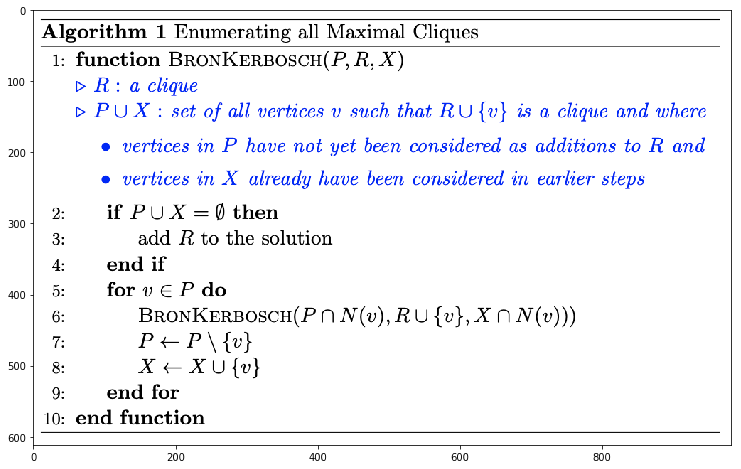

In [2]:
algorithm = plt.imread('algo_BK.png')
plt.figure(figsize=(16, 8))
plt.imshow(algorithm)
plt.show()


### #3.2 Алгоритм с выбором опорного элемента (pivot)

Брон и Кербош придумали метод повышения эффективности основного алгоритма, выбирая опорный элемент (pivot), чтобы уменьшить число рекурсивных вызовов. Он основан на наблюдении, что $\forall u \in P \cup X$ либо сам элемент, либо один из его non-neighbours должен содержаться в любой максимальной клике, содержащей $R$. Это верно, так как если ни $u$, ни один из non-neighbours $u$ не включены в клику, содержащую R, то эта клика не может быть максимальной, потому что $u$ может быть добавлена в эту клику из-за того, что только соседи $u$ были добавлены в $R$. Следовательно, если мы изменим первый алгоритм, так что мы выбираем произвольный опорный элемент (pivot) $u \in P \cup X$ и будем итерироваться только по $u$ и всем её non-neighbours, то мы по-прежнему перечисляем все максимальные клики, содержащие $R$, но уменьшаем число рекурсивных вызовов в цикле $for$. 

Было показано, что если $u$ выбрано из $P \cup X$ таким, что у него больше всего соседей в $P$, то все максимальные клики графа $G = (V, E)$ находятся за время $O(3^{\frac{|V|}{3}}) \approx O(1.442^{|V|})$.

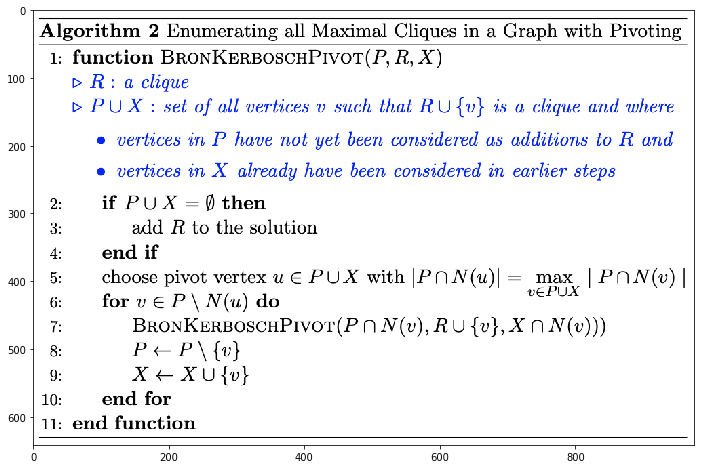

In [3]:
algorithm = plt.imread('algo_BK_pivot.png')
plt.figure(figsize=(16, 8))
plt.imshow(algorithm)
plt.show()


### Реализация алгоритмов

Граф будем хранить списком смежности.

In [4]:
def generate_clique(size):
    """Simply function which generates a clique"""
    return [np.delete(np.arange(size), i) for i in range(size)]


In [5]:
class Graph:
    size_ = 0
    edges_ = []
    max_clique_ = []
    
    
    def __init__(self, edges=[], size=None):
        
        if size is not None:
            self.edges_ = generate_clique(size)
        else:
            self.edges_ = edges  
        
        self.size_ = len(self.edges_)
            
        
    def get_neighbours(self, vertex):
        
        return self.edges_[vertex]
    
    
    def find_max_clique(self, pivot=True):
        
        self.max_clique_.clear()
        self.find_max_clique_([], list(range(self.size_)), [], pivot)
            
        return max(self.max_clique_, key=len)
    
    
    def find_max_clique_(self, max_clique, probable_nodes, 
                         exclude_nodes, pivot):
        
        if len(probable_nodes) == 0 and len(exclude_nodes) == 0:
            self.max_clique_.append(max_clique)
            
        u, vertices = 0, []
        if pivot:
            u = self.choose_pivot_(probable_nodes, exclude_nodes)
            vertices = set(probable_nodes).difference(self.get_neighbours(u))
        else:
            vertices = probable_nodes[:]

        for vertex in vertices:
            new_probable_nodes = set(probable_nodes).intersection(
                self.get_neighbours(vertex))

            new_exclude_nodes = set(exclude_nodes).intersection(
                self.get_neighbours(vertex))

            new_max_clique = max_clique + [vertex]

            self.find_max_clique_(new_max_clique, 
                                  list(new_probable_nodes), 
                                  list(new_exclude_nodes), 
                                  pivot)

            probable_nodes.remove(vertex)
            exclude_nodes.append(vertex)
        
        
    def choose_pivot_(self, probable_nodes, exclude_nodes):
        
        max_, u = 0, 0
        for vertex in probable_nodes + exclude_nodes:
            size = len(set(probable_nodes).intersection(
                self.get_neighbours(vertex)))
            
            if size >= max_:
                u = vertex
                
        return u


### #4 Тестирование алгоритмов

В этом разделе мы протестируем оба алгоритма на различных тестах, а именно:    
1) Полный граф на $n$ вершинах    
2) Случайные графы в модели Эрдеша — Реньи     

#### #4.1 Полная клика

В данном случае мы будем рассматривать полный граф на n вершинах.

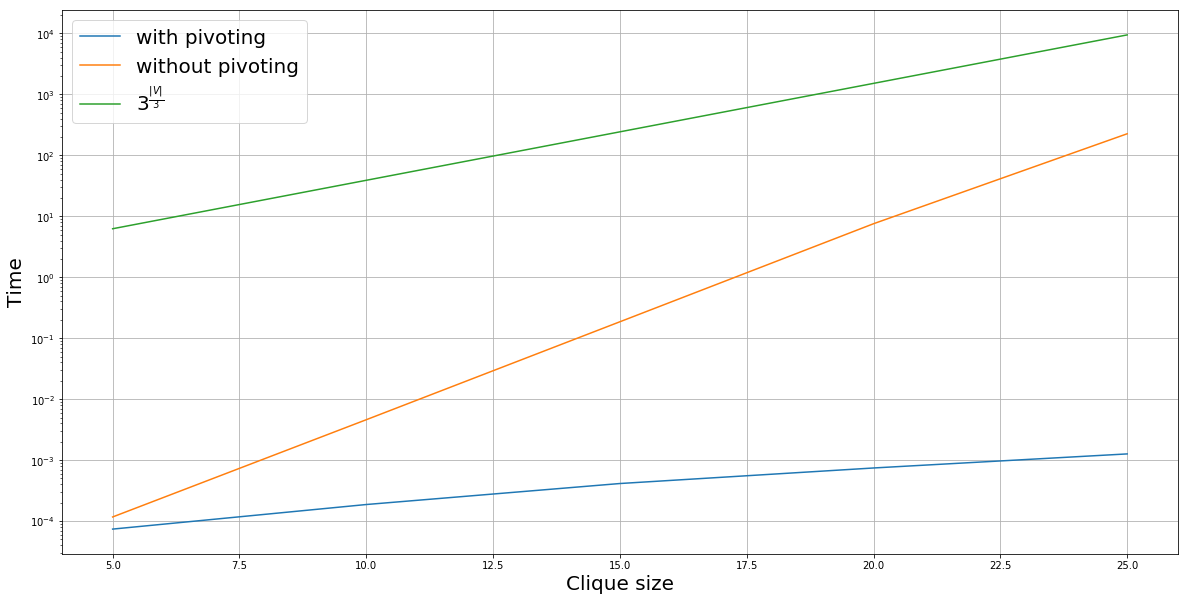

In [6]:
with_pivot, without_pivot = [], []

for size in range(5, 30, 5):
    graph = Graph(size=size)
    
    begin = time()
    graph.find_max_clique()
    with_pivot.append(time() - begin)
    
    begin = time()
    graph.find_max_clique(pivot=False)
    without_pivot.append(time() - begin)
    
    
x = np.arange(5, 30, 5)
    
plt.figure(figsize=(20, 10))
plt.semilogy(x, with_pivot, label='with pivoting')
plt.semilogy(x, without_pivot, label='without pivoting')
plt.semilogy(x, 1.442 ** x, label='$3^{\\frac{|V|}{3}}$')

plt.xlabel('Clique size', fontsize=20)
plt.ylabel('Time', fontsize=20)
plt.legend(fontsize=20)
plt.grid()
plt.show()


#### #4.2 Случайные графы в модели Эрдеша — Реньи

В данном случае мы будем рассматривать G(n, p) — случайный граф в модели Эрдеша - Реньи, где n — размер множества веришин, p — вероятность возникновения ребра.

In [7]:
def generate_random_graph(n, p=0.5):
    """Generates a random graph G(n, p)"""
    
    sample = sps.bernoulli(p).rvs(size=(n, n)) * np.tri(n, k=-1).T
    sample = sample + sample.T
    
    edges = [[] for i in range(n)]
    for i, j in np.asarray(np.nonzero(sample)).T:
        edges[i].append(j)
    
    return Graph(edges=edges)


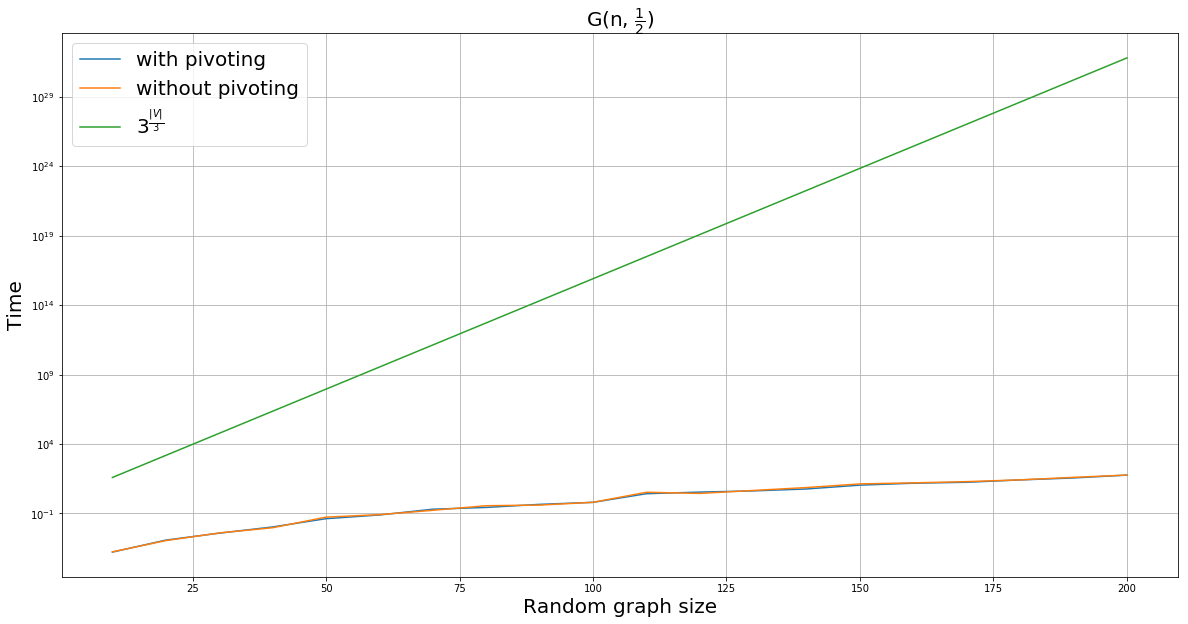

In [8]:
with_pivot, without_pivot = [], []

for size in range(10, 201, 10):
    graph = generate_random_graph(size)
    
    begin = time()
    graph.find_max_clique()
    with_pivot.append(time() - begin)
    
    begin = time()
    graph.find_max_clique(pivot=False)
    without_pivot.append(time() - begin)
    
    
x = np.arange(10, 201, 10)
    
plt.figure(figsize=(20, 10))
plt.title('G(n, $\\frac{1}{2}$)', fontsize=20)
plt.semilogy(x, with_pivot, label='with pivoting')
plt.semilogy(x, without_pivot, label='without pivoting')
plt.semilogy(x, 1.442 ** x, label='$3^{\\frac{|V|}{3}}$')

plt.xlabel('Random graph size', fontsize=20)
plt.ylabel('Time', fontsize=20)
plt.legend(fontsize=20)
plt.grid()
plt.show()


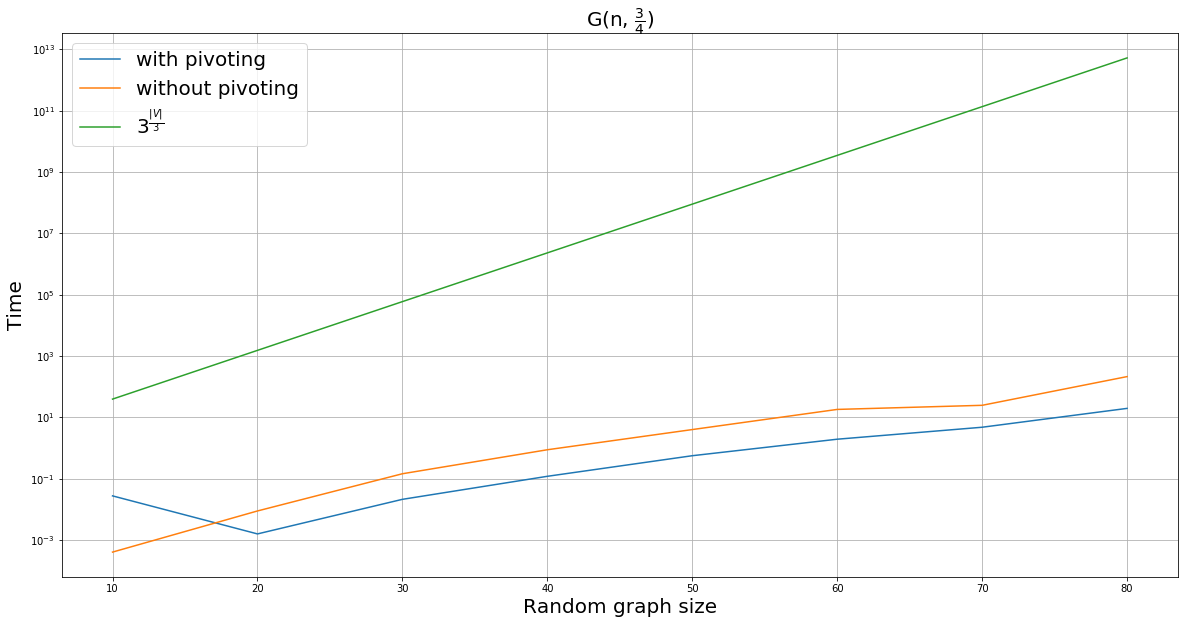

In [9]:
with_pivot, without_pivot = [], []

for size in range(10, 81, 10):
    graph = generate_random_graph(size, 3 / 4)
    
    begin = time()
    graph.find_max_clique()
    with_pivot.append(time() - begin)
    
    begin = time()
    graph.find_max_clique(pivot=False)
    without_pivot.append(time() - begin)
    
    
x = np.arange(10, 81, 10)
    
plt.figure(figsize=(20, 10))
plt.title('G(n, $\\frac{3}{4}$)', fontsize=20)
plt.semilogy(x, with_pivot, label='with pivoting')
plt.semilogy(x, without_pivot, label='without pivoting')
plt.semilogy(x, 1.442 ** x, label='$3^{\\frac{|V|}{3}}$')

plt.xlabel('Random graph size', fontsize=20)
plt.ylabel('Time', fontsize=20)
plt.legend(fontsize=20)
plt.grid()
plt.show()


### #5 Заключение

Сначала мы сформулировали задачу, которую собираемся решать. Потом в нескольких предложениях рассказали, где и в каких других сферах эта задача может встречаться. Потом описали две реализации алгоритма Брона - Кербоша. Попробавали их на различных примерах. Увидели, что на полных графах вторая реализация алгоритма работает гораздо лучше, следовательно, на практике на графах малой размерности можно пользоваться им. На случайных графах с разной вероятностью ребра -- обе реализации ведут себя примерно одинаково.

### #6 Ссылки:

[1] -- https://en.wikipedia.org/wiki/Bron%E2%80%93Kerbosch_algorithm                                                   
[2] -- https://arxiv.org/abs/1605.03871
